# House price prediction 


In [11]:
#import các thư viện cần thiết để phân tích dữ liệu
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("C:\\Users\\ACER\\Downloads\\Housing.csv")
# Xem 5 dòng đầu
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


# Nó có tổng tất cả là 13 đặc trưng. Và ta cần phải chọn ra xem đặc trưng nào sẽ ảnh hưởng đến kết quả mô hình mà chúng ta training 


In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


# ta thấy không có missing data nào 

# Bước 2: EDA (Phân tích dữ liệu khám phá)

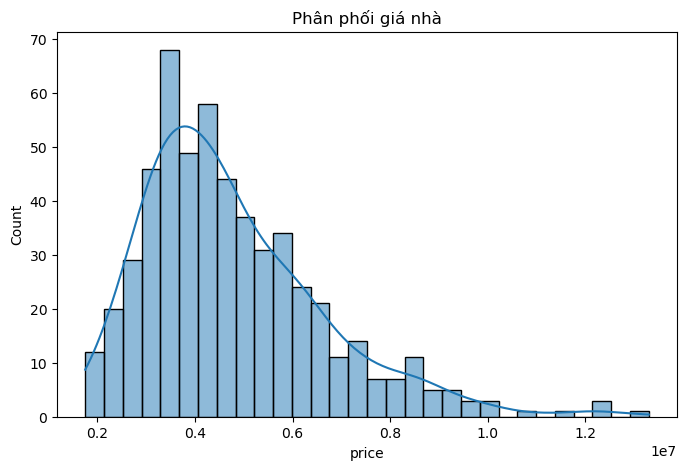

In [18]:
# 1. Phân phối giá nhà
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Phân phối giá nhà")
plt.show() 


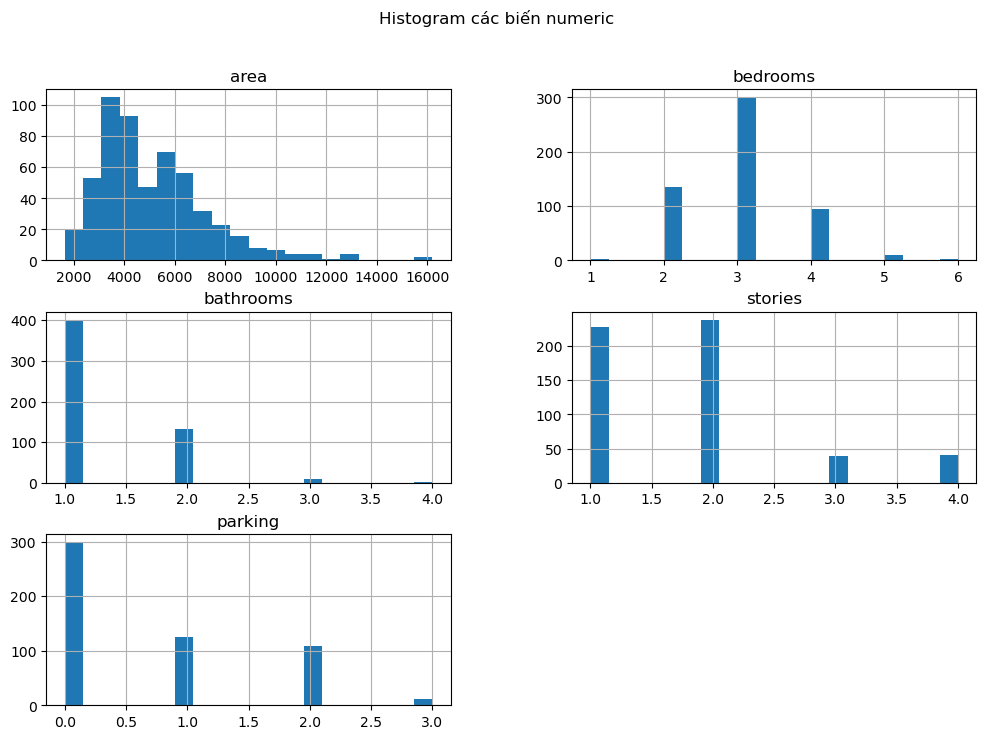

In [28]:
# 2. Histogram các biến numeric
numeric_cols = ['area','bedrooms','bathrooms','stories','parking']
df[numeric_cols].hist(bins=20, figsize=(12,8))
plt.suptitle("Histogram các biến numeric")
plt.show()

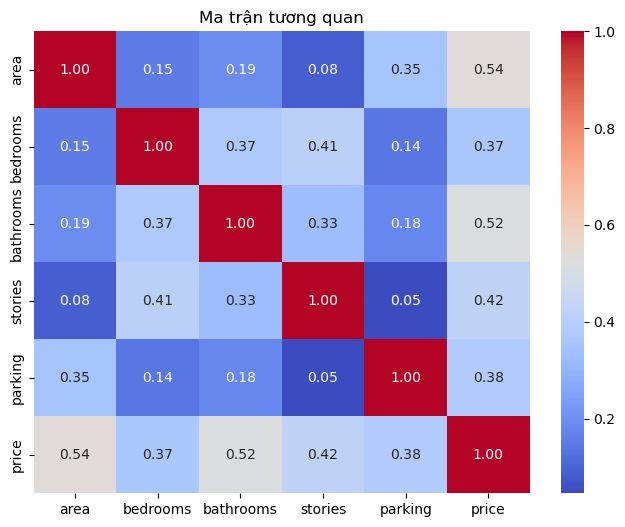

In [30]:
# 3. Heatmap tương quan
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols + ['price']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma trận tương quan")
plt.show()

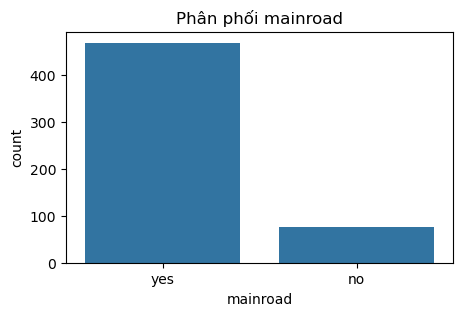

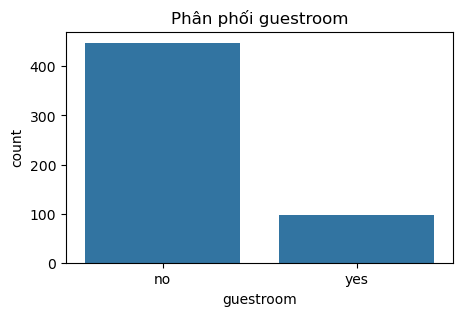

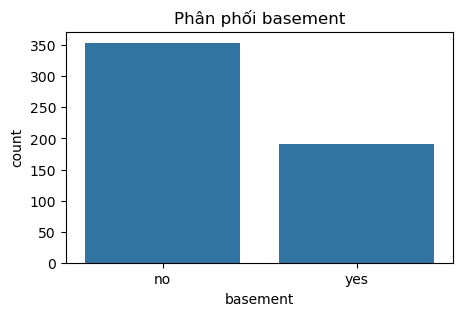

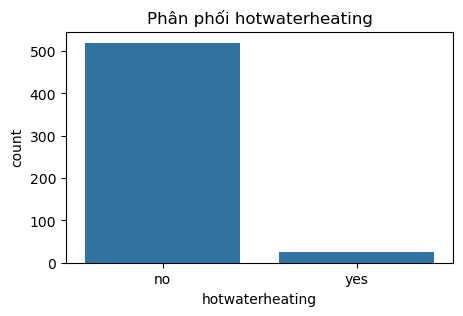

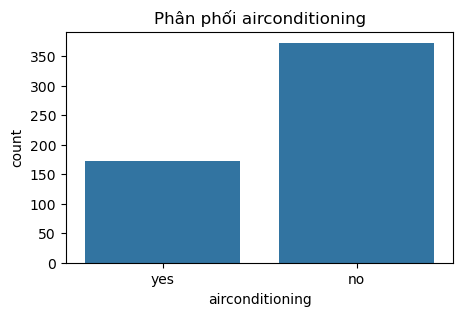

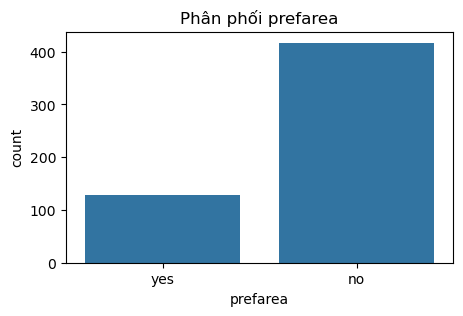

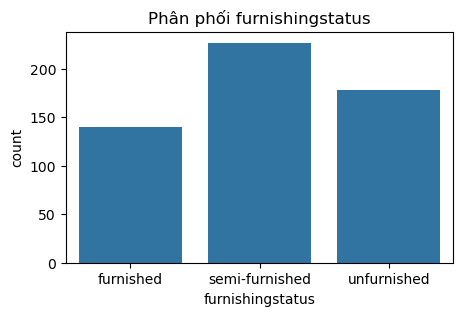

In [47]:
# 4. Barplot cho các biến categorical
categorical_cols = ['mainroad','guestroom','basement','hotwaterheating',
                    'airconditioning','prefarea','furnishingstatus']

for col in categorical_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=col, data=df)
    plt.title(f"Phân phối {col}")
    plt.show()

# Bước 3 : mã hóa dữ liệu
và chia tập dữ liệu cần thành 2 tập train và test

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [32]:
# Encode yes/no thành 0/1
binary_cols = ['mainroad', 'guestroom', 'basement', 
               'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

In [34]:
# One-Hot Encoding cho furnishingstatus
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

In [36]:
# Tách features và target
X = df.drop('price', axis=1)
y = df['price']

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [38]:
# Chuẩn hóa dữ liệu numeric
scaler = StandardScaler()
num_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Training Model

In [40]:
# import model 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [42]:
# khởi tại và train model
# Khởi tạo mô hình Linear Regression
lin_reg = LinearRegression()

# Huấn luyện trên tập train
lin_reg.fit(X_train, y_train)


LinearRegression()

In [44]:
# dự đoán trên train và test 
# Dự đoán
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)


In [46]:
# đánh giá mô hình 
# Hàm đánh giá
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Đánh giá trên train
train_mae, train_rmse, train_r2 = evaluate(y_train, y_train_pred)

# Đánh giá trên test
test_mae, test_rmse, test_r2 = evaluate(y_test, y_test_pred)

print("Train set:")
print(" MAE:", train_mae)
print(" RMSE:", train_rmse)
print(" R²:", train_r2)

print("\nTest set:")
print(" MAE:", test_mae)
print(" RMSE:", test_rmse)
print(" R²:", test_r2)


Train set:
 MAE: 719242.8936724712
 RMSE: 984051.9236507412
 R²: 0.6859438988560158

Test set:
 MAE: 970043.4039201641
 RMSE: 1324506.9600914402
 R²: 0.6529242642153176


# Thử với Ridge regression model

In [50]:
# Import & khởi tạo Ridge
from sklearn.linear_model import Ridge

# Khởi tạo mô hình Ridge
ridge_reg = Ridge(alpha=1.0)   # alpha là hệ số regularization
ridge_reg.fit(X_train, y_train)


Ridge()

In [52]:
# Dự đoán
y_train_pred_ridge = ridge_reg.predict(X_train)
y_test_pred_ridge = ridge_reg.predict(X_test)

# Hàm đánh giá (như trước)
def evaluate(y_true, y_pred):
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    import numpy as np
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Kết quả train
train_mae, train_rmse, train_r2 = evaluate(y_train, y_train_pred_ridge)

# Kết quả test
test_mae, test_rmse, test_r2 = evaluate(y_test, y_test_pred_ridge)

print("Ridge - Train set:")
print(" MAE:", train_mae)
print(" RMSE:", train_rmse)
print(" R²:", train_r2)

print("\nRidge - Test set:")
print(" MAE:", test_mae)
print(" RMSE:", test_rmse)
print(" R²:", test_r2)


Ridge - Train set:
 MAE: 718437.6573658902
 RMSE: 984097.7712962645
 R²: 0.6859146340014346

Ridge - Test set:
 MAE: 971370.2374030844
 RMSE: 1326096.0986867459
 R²: 0.6520909242049431


Ta nên thử với nhiều giá tri alpha để tìm ra giá trị tối ưu

In [55]:
for a in [0.01, 0.1, 1, 10, 100]:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    mae, rmse, r2 = evaluate(y_test, y_pred)
    print(f"alpha={a}: MAE={mae:.0f}, RMSE={rmse:.0f}, R²={r2:.3f}")


alpha=0.01: MAE=970057, RMSE=1324523, R²=0.653
alpha=0.1: MAE=970182, RMSE=1324668, R²=0.653
alpha=1: MAE=971370, RMSE=1326096, R²=0.652
alpha=10: MAE=979664, RMSE=1338647, R²=0.645
alpha=100: MAE=1041287, RMSE=1424534, R²=0.599
